In [2]:
#install and import libraries
import sys

!conda install --yes --prefix {sys.prefix} -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from Functions import *

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
#read in NFL combine WR file
file = '..\Data\Final_Data.csv'
df = pd.read_csv(file, index_col=0)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Code
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,Y,11,8,0,1.0,6,1,0,0,1
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,Y,23,8,1,6.0,3,5,1,4,1
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,Y,15,8,3,5.0,2,5,0,3,0
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,Y,11,8,3,13.0,5,8,7,5,0
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,Y,12,8,2,9.0,2,6,0,4,0


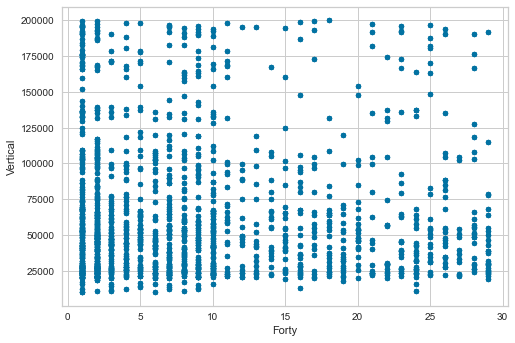

In [11]:
#plot dataset
graph_display(X = df.DistanceFromHome, y= df.MonthlyIncome, labelX='Forty', labely='Vertical')

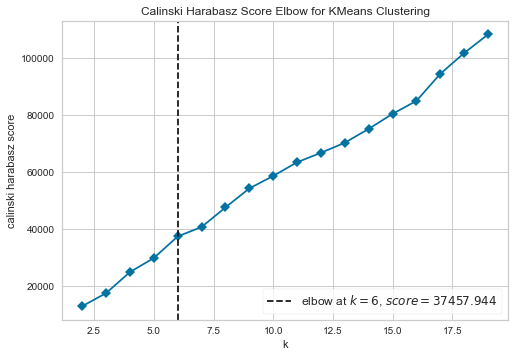

In [12]:
#determine kmeans groups
kmeans_groups(min=2, max=20, df = df[['DistanceFromHome', 'MonthlyIncome']])

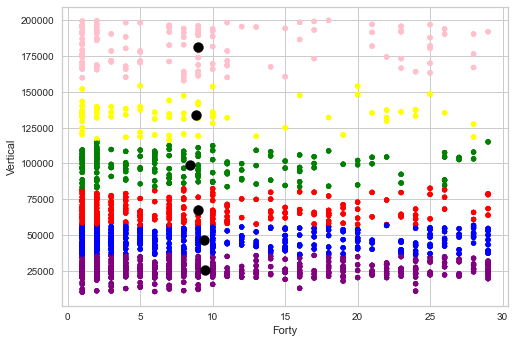

In [15]:
#4 groupings were deemed appropriate based on the score about
#plot kmeans groups
k_means, y_hat = kmeans_clust (n_clusters=6, df=df[['DistanceFromHome', 'MonthlyIncome']])


df['Predict_FortyVertical'] = y_hat

LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'yellow',
                   2: 'blue',
                   3: 'green',
                   4: 'purple',
                   5: 'pink',
                   6: 'orange',
                   7: 'brown'
                   }


label_color = [LABEL_COLOR_MAP[l] for l in y_hat]
cl_centers = k_means.cluster_centers_

graph_display(X = df.DistanceFromHome, y= df.MonthlyIncome, labelX='Forty', labely='Vertical', pred=label_color, c1X=cl_centers[:, 0], c1y=cl_centers[:, 1])
